<a href="https://colab.research.google.com/github/Hyeonu-Cha/Atlassian-Datathon-2022/blob/main/Atlassian_DataSoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atlassian Datathon
*insert some information here*

## Imports
Importing the file (if it's not there yet)and the libraries

In [ ]:
from google.colab import files
import pandas as pd
from googletrans import Translator

# Casey
import csv
import regex
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from operator import itemgetter
import json

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
## Run this if there is no file yet
## atl_twitter_dataset = files.upload()
## atl_reddit_dataset = files.upload()

# Setting up the context
These are the codes to determine that Confluence is the area to improve on

In [ ]:
import csv
import regex
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from googletrans import Translator
nltk.download('vader_lexicon')

jira = r'(jira)'
confluence = r'(confluence)'
trello = r'(trello)'
bitbucket = r'(bitbucket)'
security = r'(bitbucket)'
fuzzy_jira = f'({jira}){{e<=1}}'
fuzzy_confluence = f'({confluence}){{e<=1}}'
fuzzy_trello = f'({trello}){{e<=1}}'
fuzzy_bitbucket = f'({bitbucket}){{e<=1}}'
fuzzy_security = f'({security}){{e<=1}}'

jira = {'count': 0, 'pos': 0, 'neg': 0, 'neu': 0}
confluence = {'count': 0, 'pos': 0, 'neg': 0, 'neu': 0}
trello = {'count': 0, 'pos': 0, 'neg': 0, 'neu': 0}
bitbucket = {'count': 0, 'pos': 0, 'neg': 0, 'neu': 0}
security = {'count': 0, 'pos': 0, 'neg': 0, 'neu': 0}
total = {'count': 0, 'pos': 0, 'neg': 0, 'neu': 0}
#translator
translator = Translator()
sia = SentimentIntensityAnalyzer()

with open('/content/atlassian_twitter_dataset.csv', encoding="utf8") as twitter_data:
    reader = csv.reader(twitter_data, delimiter=',')
    for row in reader:
        jira_matches = regex.search(fuzzy_jira, row[2], regex.BESTMATCH)
        confluence_matches = regex.search(fuzzy_confluence, row[2], regex.BESTMATCH)
        trello_matches = regex.search(fuzzy_trello, row[2], regex.BESTMATCH)
        bitbucket_matches = regex.search(fuzzy_bitbucket, row[2], regex.BESTMATCH)
        security_matches = regex.search(fuzzy_security, row[2], regex.BESTMATCH)

        sent = sia.polarity_scores(row[2])
        sent = translator.translate(sent).text
        
        total['count']+=1
        total['pos']+=sent['pos']
        total['neg']+=sent['neg']
        total['neu']+=sent['neu']

        if jira_matches:
            jira['count']+=1
            jira['pos']+=sent['pos']
            jira['neg']+=sent['neg']
            jira['neu']+=sent['neu']
        if confluence_matches:
            confluence['count']+=1
            confluence['pos']+=sent['pos']
            confluence['neg']+=sent['neg']
            confluence['neu']+=sent['neu']
        if trello_matches:
            trello['count']+=1
            trello['pos']+=sent['pos']
            trello['neg']+=sent['neg']
            trello['neu']+=sent['neu']
        if bitbucket_matches:
            bitbucket['count']+=1
            bitbucket['pos']+=sent['pos']
            bitbucket['neg']+=sent['neg']
            bitbucket['neu']+=sent['neu']
        if security_matches:
            security['count']+=1
            security['pos']+=sent['pos']
            security['neg']+=sent['neg']
            security['neu']+=sent['neu']

print(f'Total: {round((total["count"]/total["count"])*1000)/10}%', f'Pos: {round((total["pos"]/total["count"])*100)/100}', f'Neu: {round((total["neu"]/total["count"])*100)/100}', f'Neg: {round((total["neg"]/total["count"])*100)/100}')
print(f'Jira: {round((jira["count"]/total["count"])*1000)/10}%', f'Pos: {round((jira["pos"]/jira["count"])*100)/100}', f'Neu: {round((jira["neu"]/jira["count"])*100)/100}', f'Neg: {round((jira["neg"]/jira["count"])*100)/100}')
print(f'Confluence: {round((confluence["count"]/total["count"])*1000)/10}%', f'Pos: {round((confluence["pos"]/confluence["count"])*100)/100}', f'Neu: {round((confluence["neu"]/confluence["count"])*100)/100}', f'Neg: {round((confluence["neg"]/confluence["count"])*100)/100}')
print(f'Trello: {round((trello["count"]/total["count"])*1000)/10}%', f'Pos: {round((trello["pos"]/trello["count"])*100)/100}', f'Neu: {round((trello["neu"]/trello["count"])*100)/100}', f'Neg: {round((trello["neg"]/trello["count"])*100)/100}')
print(f'Bitbucket: {round((bitbucket["count"]/total["count"])*1000)/10}%', f'Pos: {round((bitbucket["pos"]/bitbucket["count"])*100)/100}', f'Neu: {round((bitbucket["neu"]/bitbucket["count"])*100)/100}', f'Neg: {round((bitbucket["neg"]/bitbucket["count"])*100)/100}')
print(f'Security: {round((security["count"]/total["count"])*1000)/10}%', f'Pos: {round((security["pos"]/security["count"])*100)/100}', f'Neu: {round((security["neu"]/security["count"])*100)/100}', f'Neg: {round((security["neg"]/security["count"])*100)/100}')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


TypeError: ignored

This results in the graphs below:

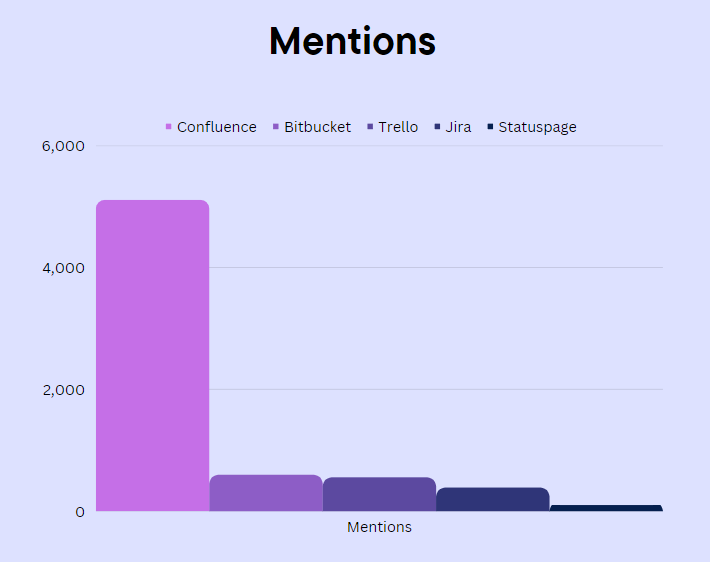
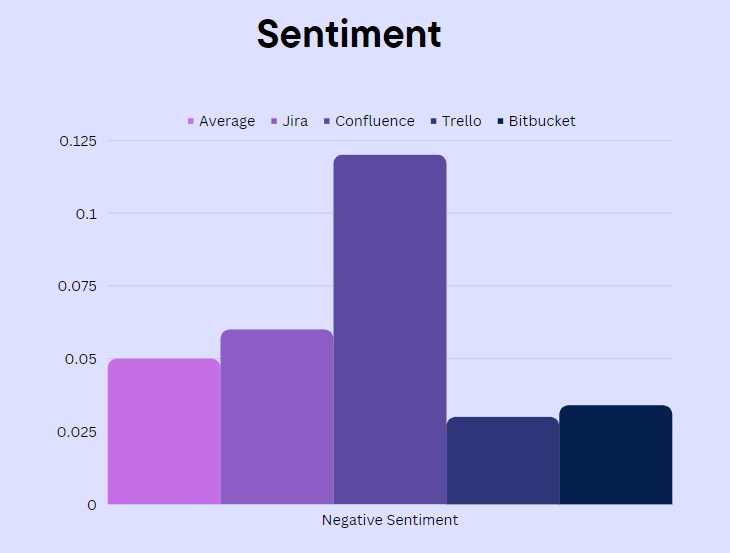

# Getting Negative Sentiment Details from Twitter related to Confluence

As shown from the details from sorting the pandas dataframe, most of common topic from the top engaged tweet relates to Confluence's Security

In [ ]:
confluence = r'(confluence)'
fuzzy_confluence = f'({confluence}){{e<=1}}'

sia = SentimentIntensityAnalyzer()
confluence_negative_tweet = []
with open('/content/atlassian_twitter_dataset.csv', encoding="utf8") as twitter_data:
    reader = csv.reader(twitter_data, delimiter=',')
    for row in reader:
        confluence_matches = regex.search(fuzzy_confluence, row[2], regex.BESTMATCH)
        sent = sia.polarity_scores(row[2])
        if confluence_matches:
            if (sent['neg'] > 0): confluence_negative_tweet.append(row)
            
most_favorites = sorted(confluence_negative_tweet, key=itemgetter(4)) 
# json.dumps(most_favorites[-10:], indent=4) # Get top ten


In [ ]:
from pandas import json_normalize

data = pd.DataFrame(most_favorites, columns=["Datetime", "Tweet Id", "Text",	"Followers",	"Favourites",	"Location",	"Friends",	"Retweets",	"Tweet Likes", "Tweet Replies"])
data
# df = pd.DataFrame(data_transposed, columns=["Team", "Player", "Salary", "Role"])

,Datetime,Tweet Id,Text,Followers,Favourites,Location,Friends,Retweets,Tweet Likes,Tweet Replies
0,2022-06-29 01:41:26+00:00,1541959999483543552,Atlassian Confluence Exploits Peak at 100K Dai...,295,0,,51,0,0,0
1,2022-06-28 19:41:29+00:00,1541869412055240704,Atlassian Confluence Exploits Peak at 100K Dai...,45,0,Reddit,90,0,0,0
2,2022-06-28 18:08:07+00:00,1541845918747598849,"#cybersecurite\nDarkReading posted ""Atlassian ...",69,0,"Paris, France",7,0,0,0
3,2022-06-28 18:03:04+00:00,1541844647785271296,Atlassian Confluence Exploits Peak at 100K Dai...,2722,0,Internet,1899,0,0,0
4,2022-06-28 18:00:03+00:00,1541843887030824961,Atlassian Confluence Exploits Peak at 100K Dai...,78,0,,19,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2298,2022-06-08 18:39:16+00:00,1534605998241218560,Linux botnets now exploit critical Atlassian C...,238,9946,"Bengaluru, India",695,0,0,0
2299,2022-06-03 11:45:05+00:00,1532689828118429696,Critical Atlassian Confluence zero-day activel...,238,9946,"Bengaluru, India",695,0,0,0
2300,2022-06-03 00:28:14+00:00,1532519494215577600,No patch for actively exploited Atlassian Conf...,14228,99567,Around the 30th.,13006,0,2,0
2301,2022-06-07 23:10:48+00:00,1534311943678337024,Atlassian Confluence Exploits Seen By Our Hone...,112845,998,"Jacksonville, FL, USA",85,10,23,0


In [ ]:
followers = data.sort_values(by=['Followers'], ascending=False)
followers

,Datetime,Tweet Id,Text,Followers,Favourites,Location,Friends,Retweets,Tweet Likes,Tweet Replies
590,2022-06-03 10:36:34+00:00,1532672582662627328,Atlassian Confluence Servers Hacked via Zero-D...,998,15594,KSA | UAE,2533,0,0,0
589,2022-06-07 11:36:53+00:00,1534137315785945088,Attackers Use Public Exploits to Throttle Atla...,998,15594,KSA | UAE,2533,0,0,0
588,2022-06-08 08:40:05+00:00,1534455209975500800,Atlassian patched the Confluence vulnerability...,998,15594,KSA | UAE,2533,0,0,0
640,2022-06-03 11:30:41+00:00,1532686203824267265,Daily Summary #Cyberattacks 3 June\n\n🔵Critica...,9962,1629,Spain | Portugal,1060,0,1,0
1731,2022-06-08 14:03:06+00:00,1534536501190606849,📢❗Alert: A new zero day vulnerability actively...,9950,4778,"San Francisco, CA",1453,2,3,0
...,...,...,...,...,...,...,...,...,...,...
201,2022-03-01 19:02:59+00:00,1498735570096373767,We’re experts at combining the #Atlassian suit...,1,0,"Kent, Ohio",0,0,0,0
29,2022-06-13 17:38:02+00:00,1536402527595413508,📢❗Alert: A new zero day vulnerability actively...,0,0,,1,0,0,0
147,2022-06-03 13:30:06+00:00,1532716253911080962,Atlassian orders customers to cut internet acc...,0,0,,3,0,0,0
864,2022-06-06 11:05:35+00:00,1533767050346127362,Atlassian is working on a fix for a critical C...,0,2,,1,0,0,0


In [ ]:
likes = data.sort_values(by=['Tweet Likes'], ascending=False)
likes

,Datetime,Tweet Id,Text,Followers,Favourites,Location,Friends,Retweets,Tweet Likes,Tweet Replies
1874,2022-06-02 23:56:11+00:00,1532511428451631108,🚨 A RCE Vulnerability (CVE-2022-26134) in Atla...,214617,585,"Washington, DC",71,74,97,2
2168,2022-06-18 04:12:13+00:00,1538011678549299202,Cybercriminals are actively exploiting a recen...,857026,8086,The Internet,2141,66,96,8
2169,2022-06-04 09:01:18+00:00,1533010999149703168,Atlassian has released a security patch that a...,857027,8086,The Internet,2141,63,95,2
1191,2022-04-11 19:50:26+00:00,1513605414029516806,Nearly a week since ~400 companies can not use...,129802,27538,"Amsterdam, The Netherlands",1239,216,942,32
1985,2022-05-02 11:52:06+00:00,1521095181419913216,"Log4Shell, ProxyShell, ProxyLogon, ZeroLogon, ...",6019,6563,"Seattle, WA",6129,58,91,0
...,...,...,...,...,...,...,...,...,...,...
1001,2022-06-03 10:00:36+00:00,1532663535133765633,Critical Atlassian Confluence zero-day activel...,278,2305,,627,0,0,0
1000,2022-06-03 12:15:23+00:00,1532697454298136577,Atlassian has warned of a critical unpatched r...,23,23,Praha,24,0,0,0
999,2022-06-09 09:33:17+00:00,1534830984054591489,Several botnets are now using exploits targeti...,23,23,Praha,24,0,0,0
998,2022-06-11 06:00:16+00:00,1535502154554912768,A cryptomining hacking group has been observed...,23,23,Praha,24,0,0,0
